# Exercise 10.1
The first exercise of lecture 09 asks to tackle the TSP with a different approach: Simulated Annealing. It is essentialy a sequence of Metropolis simulations run at different temperatures with different number of steps. SA tries to reproduce the same mechanism that allows nature to find the minimum energy state of a system that is slowly cooled down.
To carry out the task, we apply at first some changes to the genetic algorythm of the previous lecture such as removing the population class (SA works on a single path, there is no population needed) and we implement a metropolis-like step with the following charachteristics:
- given a path (chromosome in the code), a new one is proposed through a mutation (there are four possible ones, each with probability 1/4);
- the new path is accepted according to the probability $p=min\left[1, \exp(-\beta (L_{new}(x) - L_{old}(x)))\right]$, where $L(x)$ is the cost function.

The system is hence interpreted as a statistic-mechanical problem in which the energy of the system is $L(x)$.

After some trials it is possible to reach the optimal travel path. No relavant problems arise with the circle map and the best path lenght (the same of exercise 09) is obtained through a simple annealing schedule. On the contrary, for the random-in-square map, several trials are needed. The main problem consists in the presence of local minima, with lenght very similar to the minimum, where the path gets easily trapped. However, with a proper schedule we manage to get to the same result of exercise 09.

Here are the detailed schedules:
#### Circle map
$n=2000$ steps, $T=0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01$

#### Random in square map
$n=10000$, $T_i=0.5-0.05i$ until $T_{i_{max}}=0.1$, $T_{i}=0.1-0.005(i-{i_{max}})$ until $T=0.01$

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def plot_results(Map):
    cost_func = np.loadtxt(f'Ex01/{Map}/cost_file.dat', delimiter=' ',unpack='True')
    x=np.arange(cost_func.size)
    print(f'best path length={cost_func[-1]}')
    plt.plot(x,cost_func)
    plt.xlabel('steps')
    plt.ylabel(f'$L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$')
    plt.grid(True)
    plt.title(r'COST FUNCTION $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$')


    cit_x,cit_y = np.loadtxt(f'Ex01/{Map}/cities.dat', usecols=(0,1), delimiter=' ',unpack='True')
    best_path = np.loadtxt(f'Ex01/{Map}/cromo_final.dat', skiprows=2, usecols=np.arange(32), delimiter=' ')

    x_=np.zeros(cit_x.size)
    y_=np.zeros(cit_x.size)

    for i in range(best_path.size):
        j=int(best_path[i])
        x_[i]=cit_x[j]
        y_[i]=cit_y[j]

    fig,ax=plt.subplots(1,1,figsize=(6,6))
    ax.scatter(cit_x,cit_y)
    ax.plot(x_,y_)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('BEST PATH PICTURE')
    ax.grid('True')

best path length=6.2403


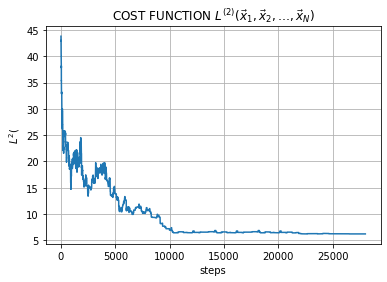

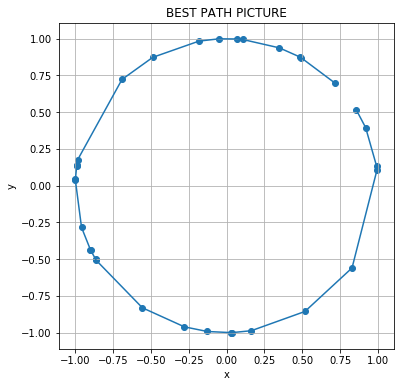

In [15]:
plot_results('circle')

best path length=9.27331


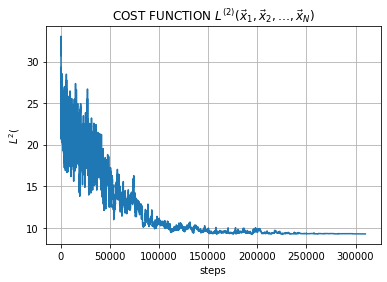

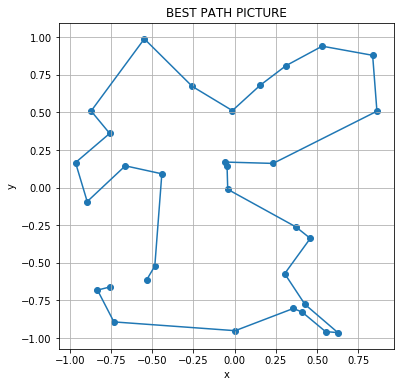

In [16]:
plot_results('Rnd_Square')

# Exercise 10.02
In the second exercise we upgrade the genetic algorythm of Exercise09 by means of MPI Libraries. We operate on four different populations of 2000 individuals, where each individual has a chromosome that encodes the path through the 32 Random-in-Square cities. Exploiting parallel computation we let the populations evolve separately for 20 steps and, after that, we randomly  exchange the 5 best path between different population. Specifically, we generate a randomly shuffled sequence containing 0,1,2,3 and the resulting order tell us the sender and the recipient of each path. For example, the sequence 0,2,3,1 tell us that the 0th process receives paths from the 1st process and it sends to the 2nd process; the 2nd process receives from the 0th and sends to the 3rd, and so on...
After a total of 200 evolution steps the best path length is plotted for each population. We observe from the plot below that around 150 steps are needed to reach the mimimum length path. On the other side, if we consider a single population of 2000 individuals, we observe that about 1700 evolution steps are now required. Even if the processes we are analysing are inherently stochastic and the typical time needed could vary, the large difference the graphs show between parallel and non parallel computing let us appreciate, qualitatively at least, the fact that parallel computing is in general more efficient.

Rank=0: best path lenght= 9.27331
Rank=1: best path lenght= 9.27331
Rank=2: best path lenght= 9.27331
Rank=3: best path lenght= 9.27331
best path lenght ex09= 9.27331


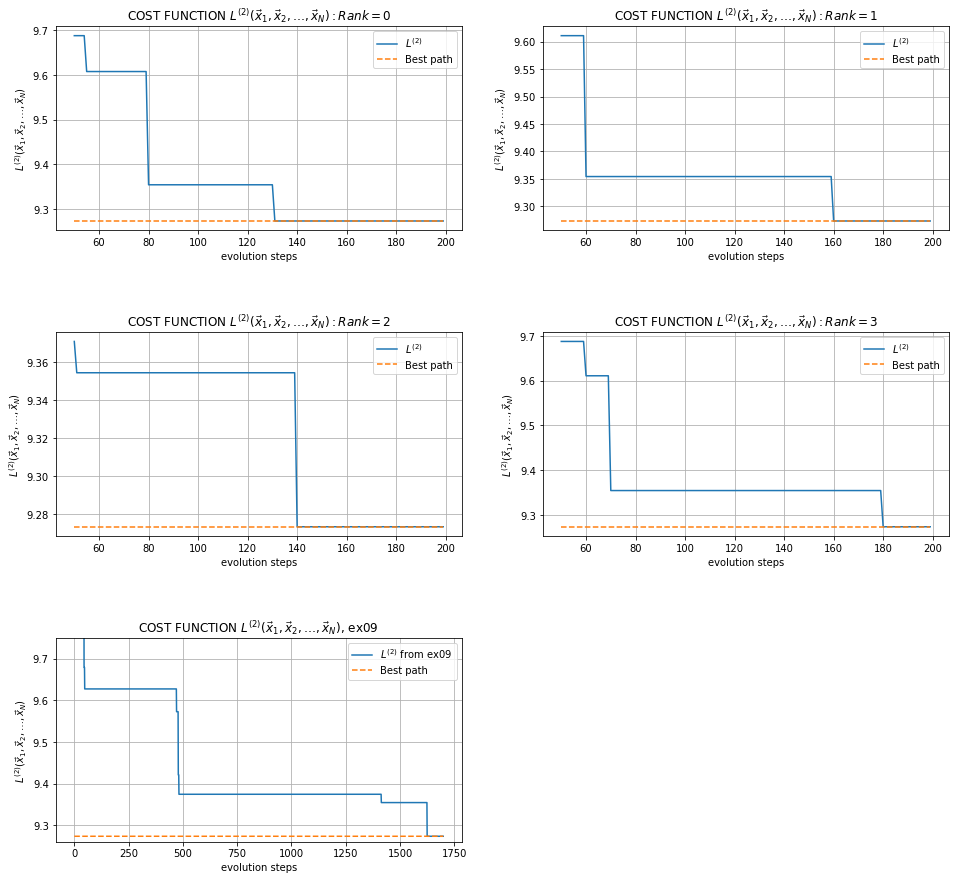

In [17]:
fig, axx=plt.subplots(3,2,figsize=(16,15))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

for i in range(4):
    best_path_i = np.loadtxt(f'Ex02/RiS_rank{i}/best_path.dat', delimiter=' ', unpack='true',skiprows=50)
    best_half_i = np.loadtxt(f'Ex02/RiS_rank{i}/best_half.dat', delimiter=' ', unpack='true')
    
    
    x=np.arange(best_path_i.size)+50
    i2=i%2
    i1=(i//2)%2
    
    
    axx[i1][i2].plot(x, best_path_i, label=r'$L^{(2)}$')
    axx[i1][i2].plot(x, 9.27331*np.ones(x.size),'--', label=r'Best path')
    #axx[i1][i2].plot(x, best_half_i, label=r'$\langle L^{(2)}\rangle$ best half')
    axx[i1][i2].set_xlabel('evolution steps')
    axx[i1][i2].set_ylabel(r'$L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$')
    axx[i1][i2].grid(True)
    axx[i1][i2].legend()
    axx[i1][i2].set_title(r'COST FUNCTION $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N):'+f' Rank={i}$')

    print(f'Rank={i}: best path lenght= {best_path_i[-1]}')
    
    
fig.delaxes(axx[2][1])    
best_path_09 = np.loadtxt(f'Ex02/best_path09.dat', delimiter=' ', unpack='true')
x=np.arange(best_path_09.size)
axx[2][0].plot(x, best_path_09, label=r'$L^{(2)}$ from ex09')
axx[2][0].set_xlabel('evolution steps')
axx[2][0].set_ylabel(r'$L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$')
axx[2][0].set_title(r'COST FUNCTION $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$, ex09')
axx[2][0].plot(x, 9.27331*np.ones(x.size),'--', label=r'Best path')
axx[2][0].set_ylim(9.26, 9.75)
axx[2][0].grid(True)
axx[2][0].legend()
    
print(f'best path lenght ex09= {best_path_09[-1]}')   
    
    